In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/signs with bodypart.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(validation_split=0.2)./  
img_height = 224
img_width = 224 
batch_size = 191
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 786 images belonging to 10 classes.
Found 191 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import vgg19
# Init the VGG model
vgg_conv = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

80142336/80134624 [==============================] - 3s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f629b8d8610> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625f3fee50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6260326050> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f625d410810> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625d439a50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625d43cf90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f625f39acd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625d439c90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625e42e6d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625f128b50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f625f12d750> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 45,725,770
Trainable params: 25,701,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
train_it.samples

1523

In [ ]:
import keras
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])

In [ ]:
nb_epochs = 100
#batch_size = 369
history = model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
4/4 [==============================] - 302s 78s/step - loss: 24.1170 - acc: 0.1992 - val_loss: 22.9774 - val_acc: 0.1885
Epoch 2/100
4/4 [==============================] - 11s 3s/step - loss: 16.4309 - acc: 0.4241 - val_loss: 11.4315 - val_acc: 0.3089
Epoch 3/100
4/4 [==============================] - 10s 2s/step - loss: 6.3502 - acc: 0.7116 - val_loss: 17.5715 - val_acc: 0.3246
Epoch 4/100
4/4 [==============================] - 11s 3s/step - loss: 5.7003 - acc: 0.7513 - val_loss: 8.6764 - val_acc: 0.3822
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 1.4945 - acc: 0.8611 - val_loss: 8.4729 - val_acc: 0.3979
Epoch 6/100
4/4 [==============================] - 10s 2s/step - loss: 1.1196 - acc: 0.9188 - val_loss: 12.2209 - val_acc: 0.3089
Epoch 7/100
4/4 [==============================] - 11s 3s/step - loss: 1.2890 - acc: 0.8956 - val_loss: 8.6384 - val_acc: 0.3874
Epoch 8/100
4/4 [==============================] - 10s 2s/step - loss: 0.6114 - acc: 0.92

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_5_VGG19")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_5_VGG19/assets


In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
num_of_test_samples = val_it.samples
batch_size = 128
Y_pred = model.predict(val_it)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_it.classes, y_pred))
print('Classification Report')
target_names = ['1', '10', '11', '12', '13', '14', '15', '16', '17',  '18', '19', '2', '20', '21',  '22',  '23',  '24',  '25',  '26',  '27','28', '29', '3', '30', '31', '32', '33', '34','35', '36', '38', '4', '5', '6', '7', '8', '9']
print(classification_report(val_it.classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 3 1 ... 1 1 3]
 [0 3 1 ... 4 2 4]
 [0 3 1 ... 2 2 2]
 ...
 [4 3 3 ... 2 2 0]
 [0 3 4 ... 2 4 1]
 [2 3 2 ... 0 3 2]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
          10       0.04      0.04      0.04        72
          11       0.01      0.01      0.01        72
          12       0.03      0.03      0.03        72
          13       0.00      0.00      0.00        72
          14       0.03      0.03      0.03        72
          15       0.01      0.01      0.01        72
          16       0.03      0.03      0.03        72
          17       0.03      0.03      0.03        72
          18       0.06      0.06      0.06        72
          19       0.06      0.06      0.06        72
           2       0.07      0.07      0.07        72
          20       0.04      0.04      0.04        72
          21       0.03      0.03      0.03        72
          22       0.06      0

In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
import keras
import numpy as np
model = keras.models.load_model("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_2_VGG19")

In [ ]:
import keras
import numpy as np
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.5026178010471204


In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 50.26%
[INFO] Loss:  7.43430233001709


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['a', 'dh', 'e', 'ga', 'i', 'k', 'kh', 'o', 'oo', 'u']


Normalized confusion matrix


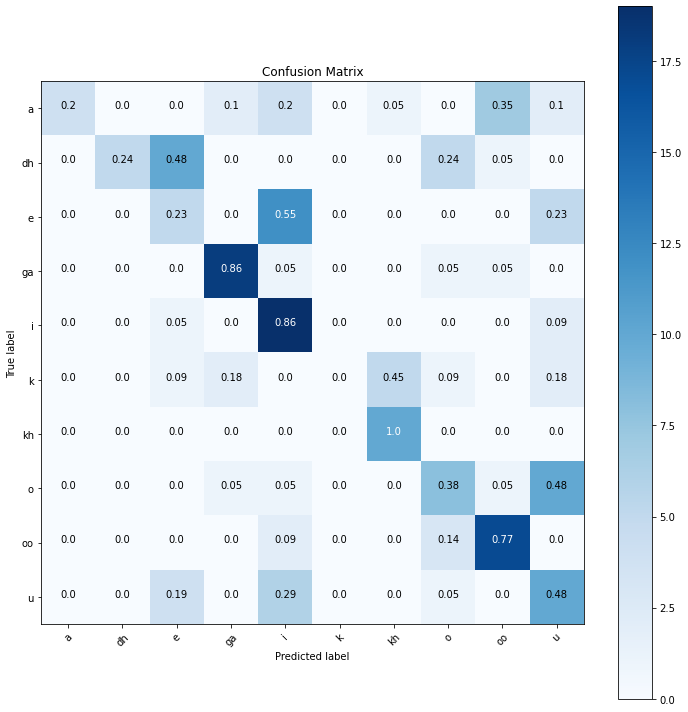

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        20
           1       1.00      0.24      0.38        21
           2       0.24      0.23      0.23        22
           3       0.78      0.86      0.82        21
           4       0.42      0.86      0.57        22
           5       0.00      0.00      0.00        11
           6       0.62      1.00      0.77        10
           7       0.42      0.38      0.40        21
           8       0.63      0.77      0.69        22
           9       0.32      0.48      0.38        21

    accuracy                           0.50       191
   macro avg       0.54      0.50      0.46       191
weighted avg       0.56      0.50      0.47       191



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
